# </font> <font color = #4854E8> DECISION TREE </font>

A decision tree is a largely used non-parametric effective machine learning modeling technique for regression and classification problems. To find solutions a decision tree makes a sequential, hierarchical decision about the outcomes variable based on the predictor data.

##  Information of Dataset
<b>Chronic Kidney Disease Dataset:</b> The Dataset contain the information of Chronic Kidney which have 400 numbers of instances and 26 number of features. The Task is to predict the chronic kidney disease either is positive(ckd) or not(notckd).

`Attrbute Informations:`<br>
age - age <br>
bp - blood pressure<br>
sg - specific gravity<br>
al - albumin<br>
su - sugar<br>
rbc - red blood cells<br>
pc - pus cell<br>
pcc - pus cell clumps<br>
ba - bacteria<br>
bgr - blood glucose random<br>
bu - blood urea<br>
sc - serum creatinine<br>
sod - sodium<br>
pot - potassium<br>
hemo - hemoglobin<br>
pcv - packed cell volume<br>
wc - white blood cell count<br>
rc - red blood cell count<br>
htn - hypertension<br>
dm - diabetes mellitus<br>
cad - coronary artery disease<br>
appet - appetite<br>
pe - pedal edema<br>
ane - anemia<br>
class - classification<br>

<b> Importing the libraries </b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

<b> Importing the Dataset </b>

In [2]:
df = pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


<b> Data Summery and Visulaization </b>

In [3]:
#Data shape
print('The number of columns :',df.shape[0])
print('The number of rows    :',df.shape[1])

The number of columns : 400
The number of rows    : 26


In [4]:
#Data Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
#Data describe
df.describe()

,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


<b> Data Preprocessing </b>

<b> Checking the datatype and converting into proper datatype </b>

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

As we can see that `pcv`, `wc` and `rc` have object type but infact it's int.

In [7]:
df['pcv'] = pd.to_numeric(df['pcv'], errors='coerce')
df['wc'] = pd.to_numeric(df['wc'], errors='coerce')
df['rc'] = pd.to_numeric(df['rc'], errors='coerce')

In [8]:
df[['pcv', 'wc', 'rc']].dtypes

pcv    float64
wc     float64
rc     float64
dtype: object

<b> Categorical Cols </b>

In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

<b> Numerical Cols </b>

In [10]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

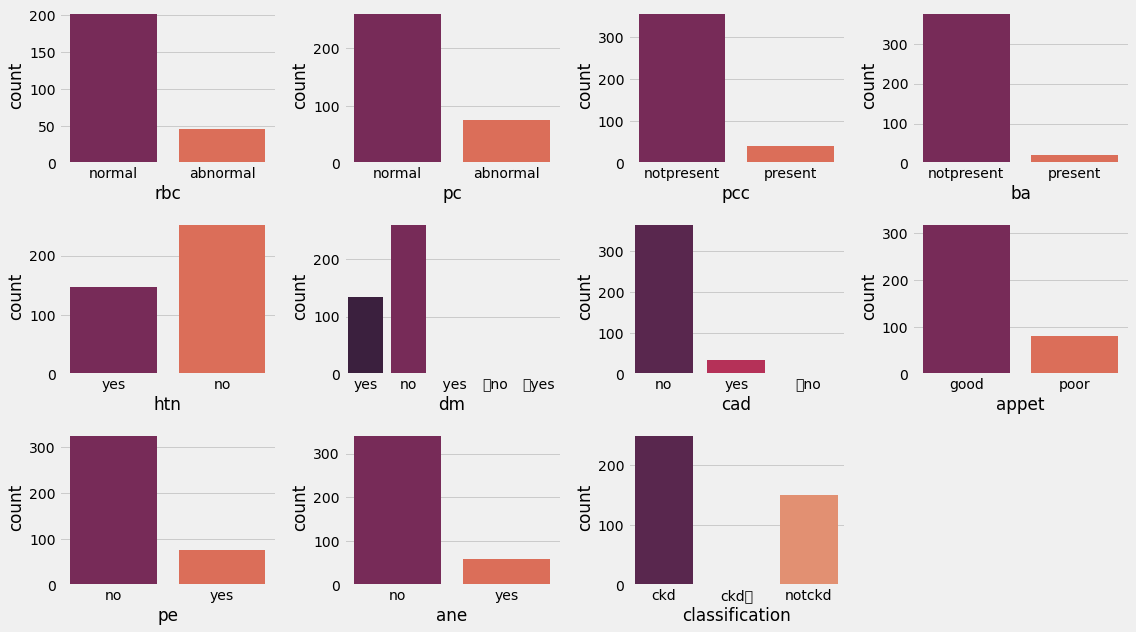

In [11]:
# looking at Obj columns

plt.figure(figsize = (16, 9))
plotnumber = 1

for column in cat_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'rocket')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

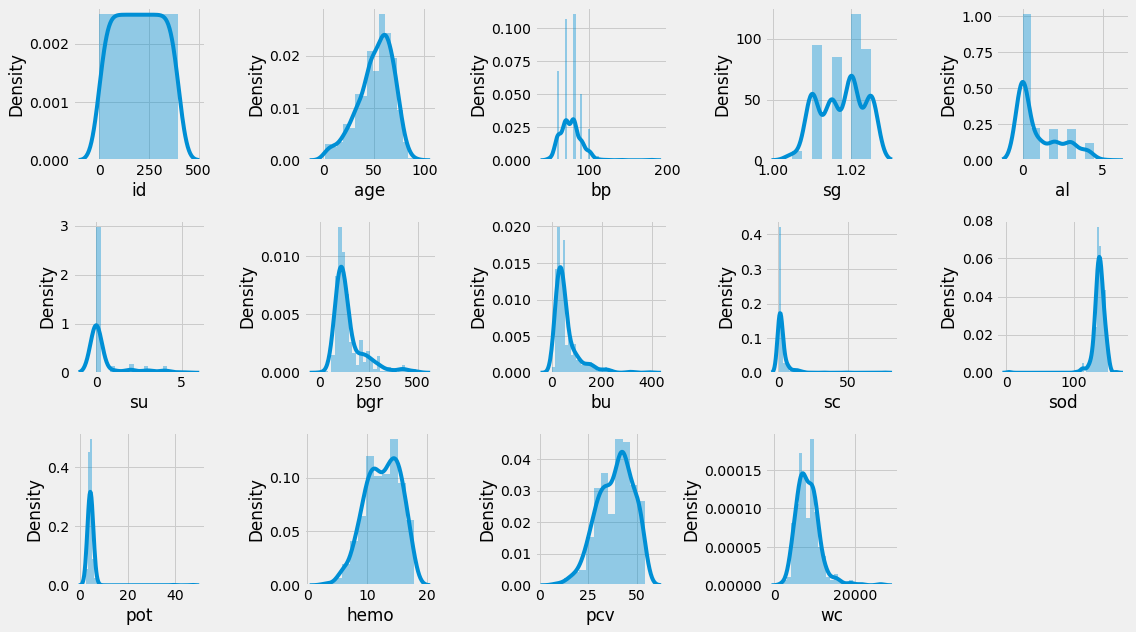

In [12]:
# checking numerical features distribution

plt.figure(figsize = (16, 9))
plotnumber = 1

for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 1152x648 with 0 Axes>

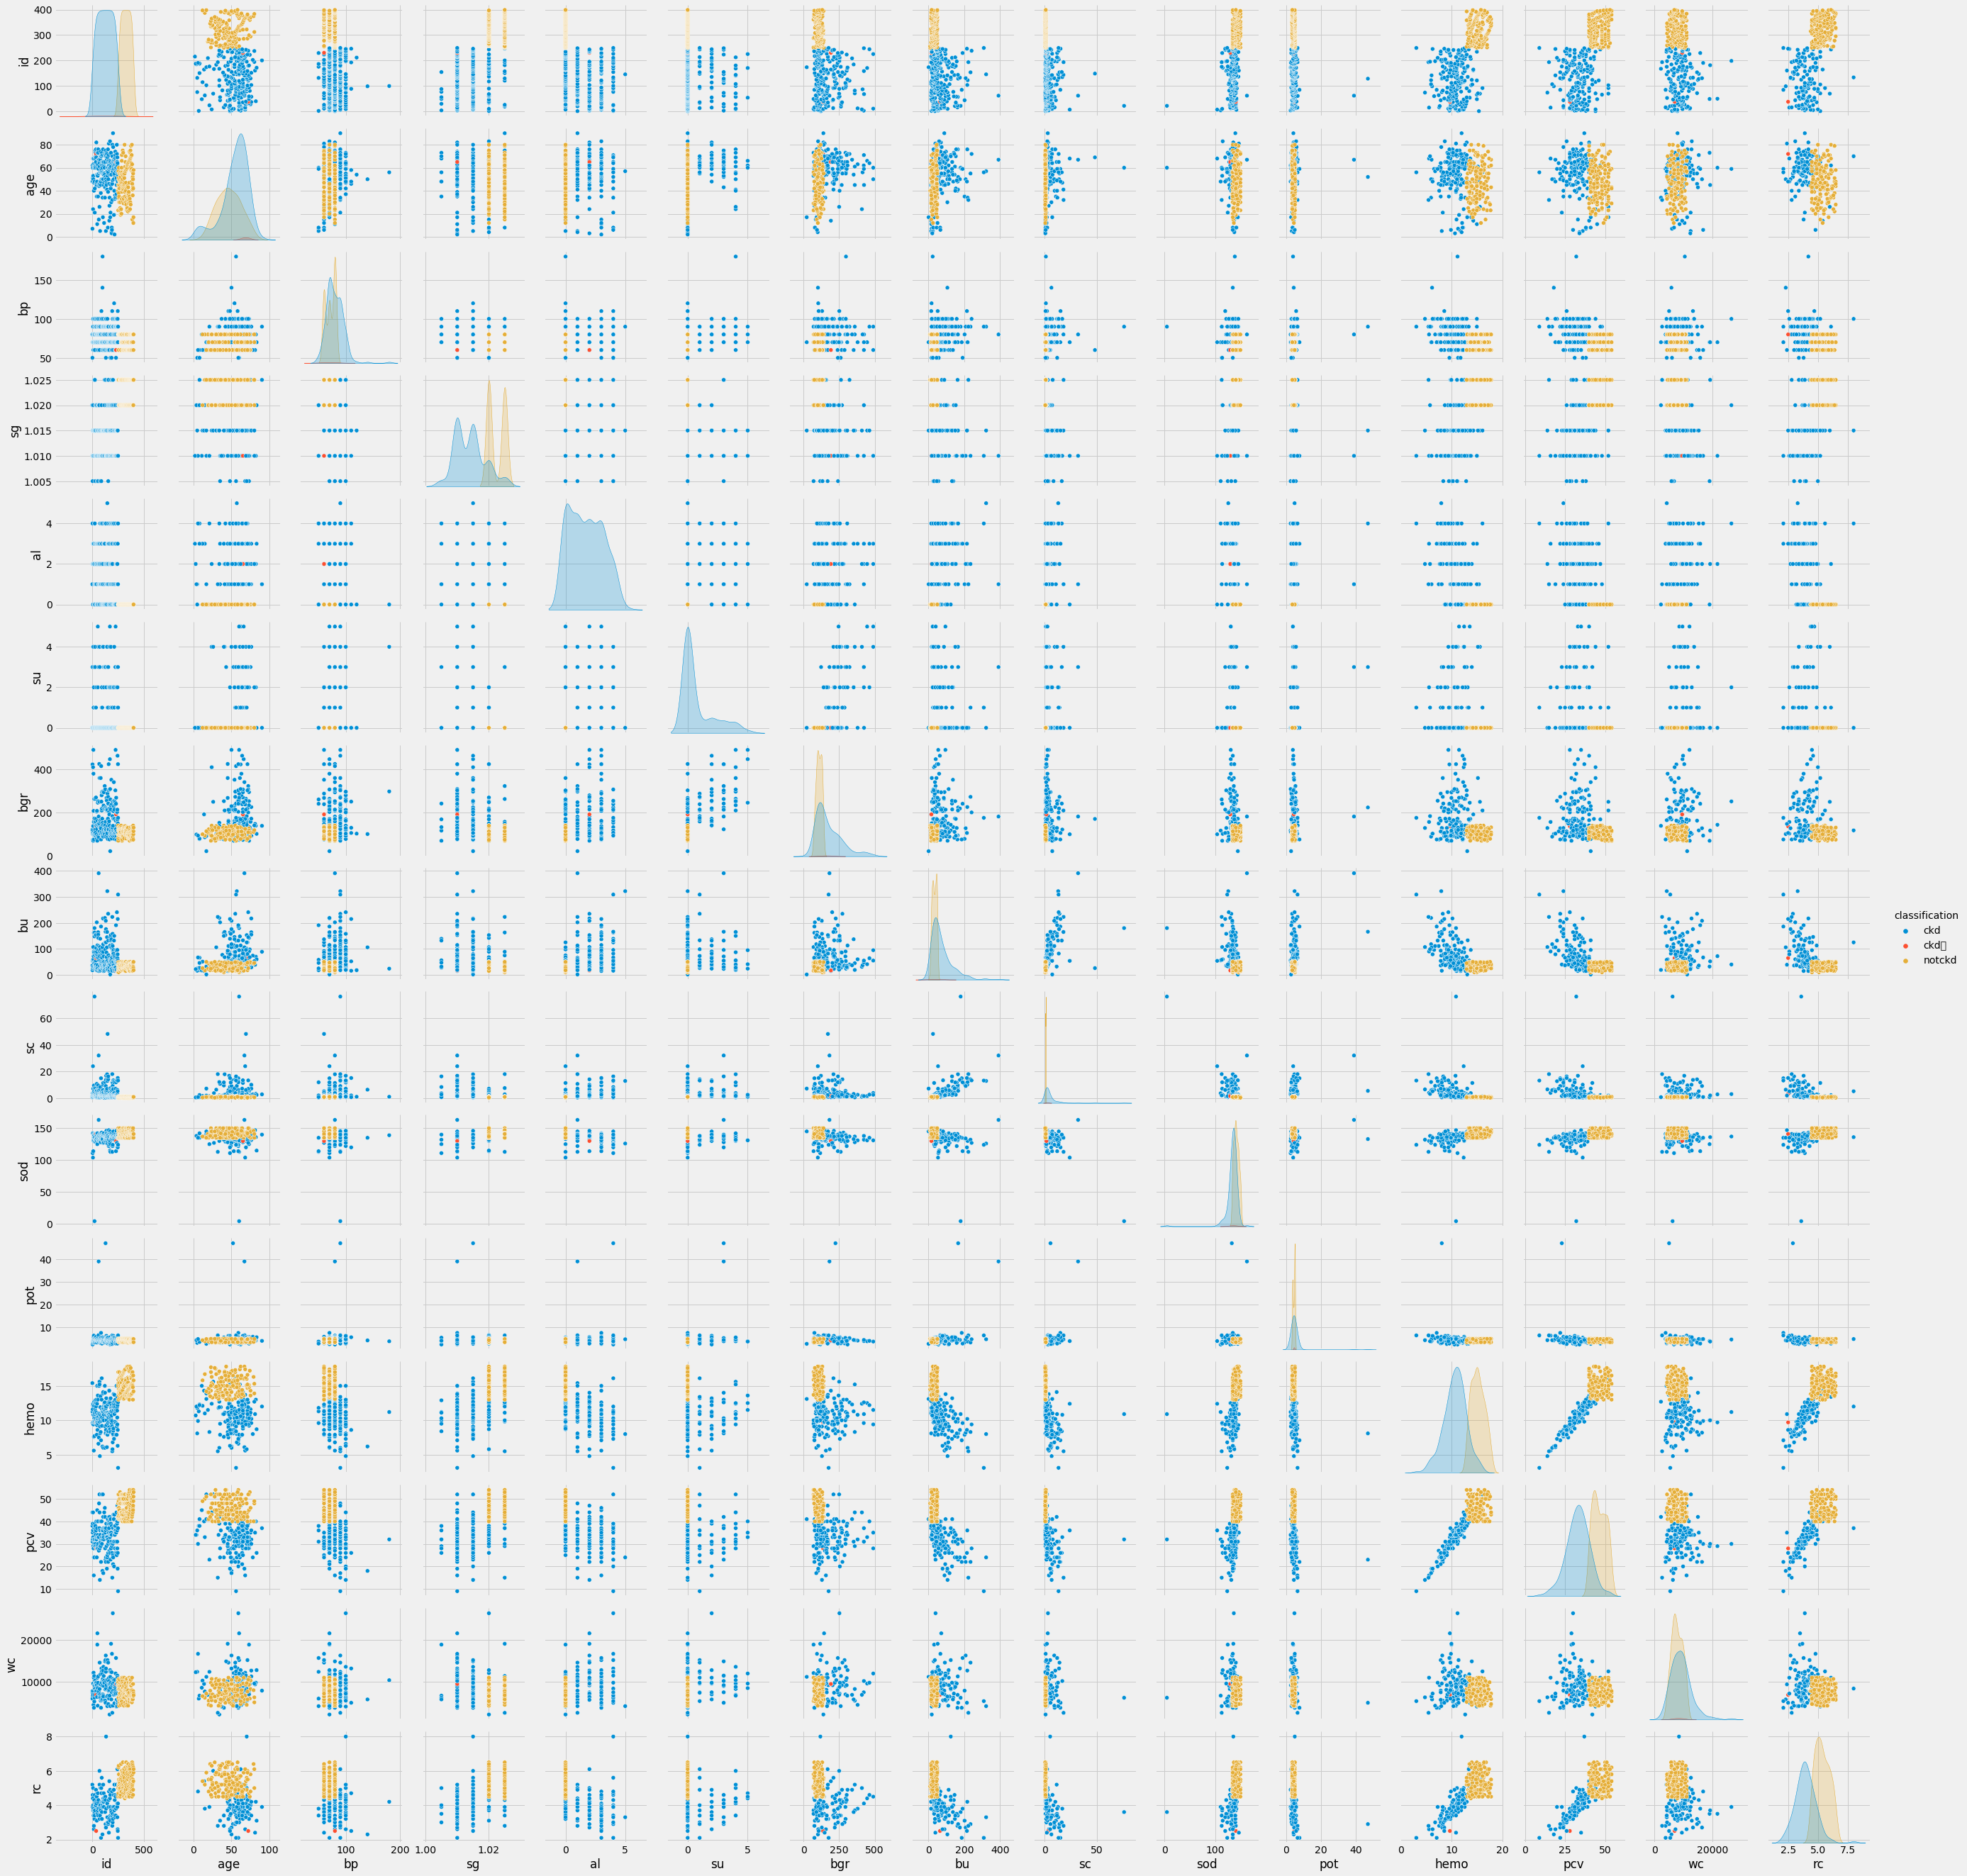

In [13]:
plt.figure(figsize = (16, 9))
sns.pairplot(df, hue = 'classification')

<b> Look into unique values in Object columns </b>

In [14]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

rbc has [nan 'normal' 'abnormal'] values

pc has ['normal' 'abnormal' nan] values

pcc has ['notpresent' 'present' nan] values

ba has ['notpresent' 'present' nan] values

htn has ['yes' 'no' nan] values

dm has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

cad has ['no' 'yes' '\tno' nan] values

appet has ['good' 'poor' nan] values

pe has ['no' 'yes' nan] values

ane has ['no' 'yes' nan] values

classification has ['ckd' 'ckd\t' 'notckd'] values



> wait wait what is `t\no`, `\yes` and `ckd\t`

There is some ambugity present in `dm`, `cad` and `classification` columns we have to remove that.

<b> Remove ambugity in respective Obj columns </b>

In [15]:
df['dm'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['cad'] = df['cad'].replace(to_replace = '\tno', value='no')

df['classification'] = df['classification'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

<b> Checking the correlation between Numerical cols </b>

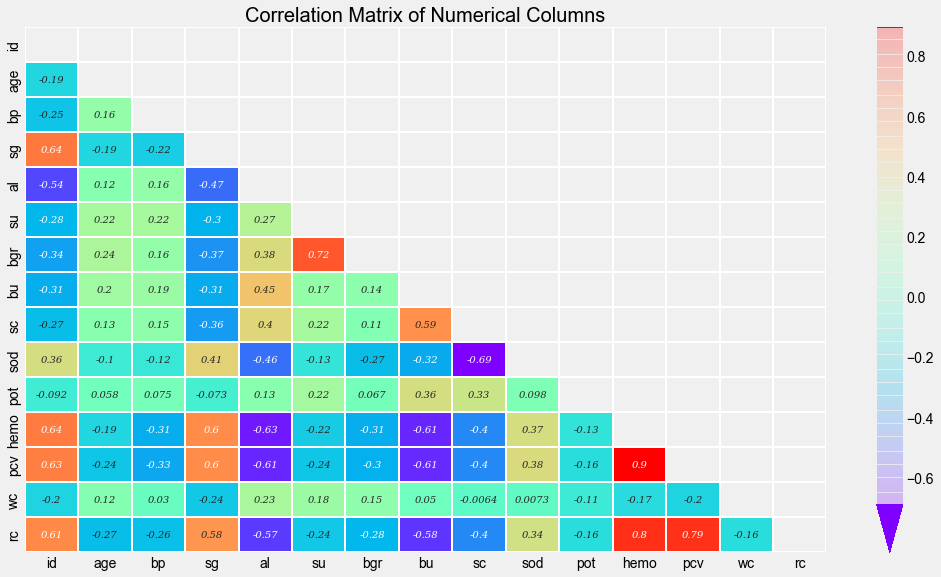

In [16]:
# Define the figure size
plt.figure(figsize = (16, 9))

# Cutomize the annot
annot_kws={'fontsize':10,                      # To change the size of the font
           'fontstyle':'italic',               # To change the style of font 
           'fontfamily': 'serif',              # To change the family of font 
           'alpha':1 }                         # To change the transparency of the text  


# Customize the cbar
cbar_kws = {"shrink":1,                        # To change the size of the color bar
            'extend':'min',                    # To change the end of the color bar like pointed
            'extendfrac':0.1,                  # To adjust the extension of the color bar
            "drawedges":True,                  # To draw lines (edges) on the color bar
           }

# take upper correlation matrix
matrix = np.triu(df.corr())

# Generate heatmap correlation
ax = sns.heatmap(df.corr(), mask = matrix, cmap = 'rainbow', annot = True, linewidth = 1.5 ,annot_kws= annot_kws, cbar_kws=cbar_kws)

# Set the title etc
plt.title('Correlation Matrix of Numerical Columns', fontsize = 20)

# Set the size of text
sns.set(font_scale = 1.2)

> Yes there is some cols who has high positive correlation (note > red color)

<b> Eliminating the high correlated columns </b>

In [17]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

# Check those cols who has more than 70% correlation
corr_features= correlation(df, 0.7)
corr_features

{'bgr', 'pcv', 'rc'}

we found that 3 cols who has more than 70% corelation 

In [18]:
# Remove those cols (more than 70% correlation)
df = df.drop(corr_features,axis=1)
df.shape   # 25 - 3 = 22

(400, 23)

<b> Data Preprocessing </b>

<b> Check for the missing values </b>

In [19]:
# check if there is any missing value
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bu                 19
sc                 17
sod                87
pot                88
hemo               52
wc                106
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [20]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [21]:
# check the missing value in Numerical Col
df[num_cols].isnull().sum()

id        0
age       9
bp       12
sg       47
al       46
su       49
bu       19
sc       17
sod      87
pot      88
hemo     52
wc      106
dtype: int64

In [22]:
# check the missing value in Obj Col
df[cat_cols].isnull().sum()

rbc               152
pc                 65
pcc                 4
ba                  4
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<b> Method that we used to handle Missing Value </b>

In [23]:
# filling null values, we will use two methods, random sampling for higher null values and 
# mean/mode sampling for lower null values

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

<b> Handle Missing Values in Numerical Cols </b>

In [24]:
# filling num_cols null values using random sampling method

for col in num_cols:
    random_value_imputation(col)

In [25]:
# check after apply opr
df[num_cols].isnull().sum().sum()

0

<b> Handling missing values in Object cols </b>

In [26]:
# filling "red_blood_cells" and "pus_cell" using random sampling method and rest of cat_cols using mode imputation

random_value_imputation('rbc')
random_value_imputation('pc')

for col in cat_cols:
    impute_mode(col)

In [27]:
# check after apply opr
df[cat_cols].isnull().sum().sum()

0

<b> Feature Encoding </b>

#Checing the categorical columns

In [28]:
df[cat_cols]

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,classification
0,normal,normal,notpresent,notpresent,yes,yes,no,good,no,no,ckd
1,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
2,normal,normal,notpresent,notpresent,no,yes,no,poor,no,yes,ckd
3,normal,abnormal,present,notpresent,yes,no,no,poor,yes,yes,ckd
4,normal,normal,notpresent,notpresent,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...
395,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
396,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
397,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd
398,normal,normal,notpresent,notpresent,no,no,no,good,no,no,not ckd


Checking categorical columns in each row

In [29]:
for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pc has 2 categories

pcc has 2 categories

ba has 2 categories

htn has 2 categories

dm has 2 categories

cad has 2 categories

appet has 2 categories

pe has 2 categories

ane has 2 categories

classification has 2 categories



>As we can in our obj cols each has 2 categories so we don't need to apply One Hot Encoder. Becuase label Encoder work here to convert into 0 and 1

<b> Label Encoder </b>

In [30]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [31]:
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

<b> Defining the Predictor and Target Attribute </b>

In [32]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [33]:
X.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,sod,pot,hemo,wc,htn,dm,cad,appet,pe,ane
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,137.0,4.2,15.4,7800.0,1,1,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,142.0,4.6,11.3,6000.0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,141.0,4.0,9.6,7500.0,0,1,0,1,0,1
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,111.0,2.5,11.2,6700.0,1,0,0,1,1,1
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,133.0,3.7,11.6,7300.0,0,0,0,0,0,0


In [34]:
y.unique()

array([0, 1])

<b> Split data into train and test </b>

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [36]:
#Training Data
print("X_train", X_train.shape)
print("Y_train", y_train.shape)

X_train (320, 22)
Y_train (320,)


In [37]:
#Testing Data
print("X_test", X_test.shape)
print("X_test", y_test.shape)

X_test (80, 22)
X_test (80,)


# Build Decision Tree Model

In this part, we build Decision Tree Classifier Model with sklearn.

<b> Importing the model from sklearn and initiize the model </b>

In [38]:
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

dt_sklearn = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

<b> Fitting the training data into the model </b>

In [39]:
dt_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

<b> Predict the test data </b>

In [40]:
y_pred = dt_sklearn.predict(X_test)

In [41]:
dt_sklearn_pred_test = dt_sklearn.predict(X_test)
dt_sklearn_pred_train = dt_sklearn.predict(X_train)

In [43]:
from sklearn.metrics import accuracy_score
Accuracy_train = accuracy_score(dt_sklearn_pred_train, y_train)
Accuracy_test = accuracy_score(dt_sklearn_pred_test, y_test)
print(f"Training Accuracy is {Accuracy_train}")
print(f"Test Accuracy is {Accuracy_test}")

Training Accuracy is 1.0
Test Accuracy is 1.0


# Evaluate the Result

In this part, we evaluate the decision tree model. first we make confusion matrix and we visualize the score following ("Accuracy", "Precision", "TPR", "FPR", "F-Score", "Specificity", "Error" and "Roc Area").

<b> Confusion matrix </b>

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, roc_auc_score

<AxesSubplot:>

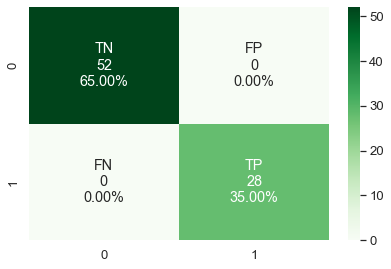

In [45]:
confusion_matrix_Scratch = confusion_matrix(y_pred, y_test)

#[row, column]
TP = confusion_matrix_Scratch[1, 1]        
TN = confusion_matrix_Scratch[0, 0]           
FP = confusion_matrix_Scratch[0, 1]           
FN = confusion_matrix_Scratch[1, 0]

group_names = ['TN','FP','FN','TP']

group_counts = ["{0:0.0f}".format(value) for value in confusion_matrix_Scratch.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in confusion_matrix_Scratch.flatten()/np.sum(confusion_matrix_Scratch)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

sns.heatmap(confusion_matrix_Scratch, annot=labels, fmt='', cmap='Greens')

<b> Calculate the results </b>

In [46]:
# Accuracy Score
Accuracy = accuracy_score(y_pred, y_test)
print('Accuracy Score:', Accuracy) 

# Precision Score
Precision = precision_score(y_pred, y_test)
print('Precision Score:', Precision)   

# True positive Rate (TPR) or Sensitivity or Recall
TPR = recall_score(y_pred, y_test)
print('True positive Rate:', TPR)             

# False positive Rate (FPR)
FPR = FP / float(TN + FP)
print('False positive Rate', FPR)                       

# F1 Score or F-Measure or F-Score
F1 = f1_score(y_pred, y_test)
print('F1 Score:', F1)                 

# Specificity
Specificity = TN / (TN + FP)
print('Specificity:', Specificity )                    

# Mean Absolute Error
Error = mean_absolute_error(y_pred, y_test)
print('Mean Absolute Error:', Error)   

# ROC Area
Roc = roc_auc_score(y_pred, y_test)
print('ROC Area:', Roc)

Accuracy Score: 1.0
Precision Score: 1.0
True positive Rate: 1.0
False positive Rate 0.0
F1 Score: 1.0
Specificity: 1.0
Mean Absolute Error: 0.0
ROC Area: 1.0
